[   218.    327.    450. ... 136009. 136045. 136076.]
[[   0]
 [   1]
 [   2]
 ...
 [1106]
 [1107]
 [1108]]


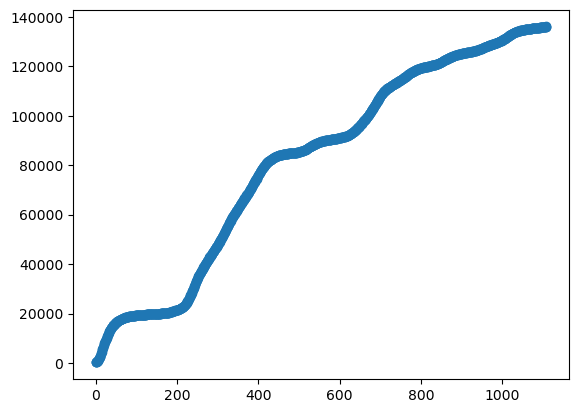

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.datasets as datasets

dc_df = pd.read_csv('../1/sources/reduced_covid_sexe.csv')
dc = dc_df.dc.drop([0,1], axis=0)
dc = dc.to_numpy()
jours = np.arange(dc.shape[0]).reshape(-1, 1)
print(dc)
print(jours)

plt.plot(jours, dc, 'o')
plt.draw()


0.9575705022706787


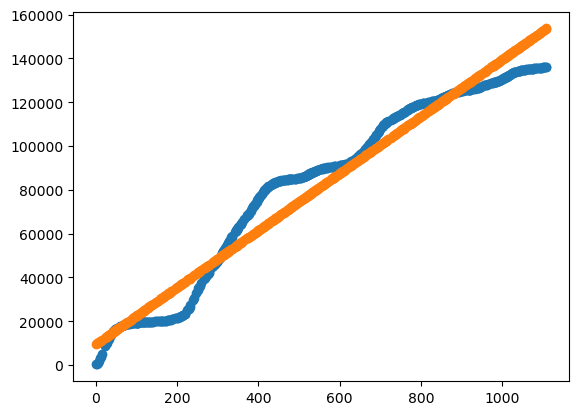

In [36]:
# faire les jeux de données pour le test et l’entrainement

xtrain, xtest, ytrain, ytest = train_test_split(jours, dc, test_size=0.5)

# train model
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtrain, ytrain))

# show predicted datas
predic = model.predict(xtest)
plt.plot(xtest, ytest, 'o')
plt.plot(xtest, predic, 'o')


0.9820394306076377


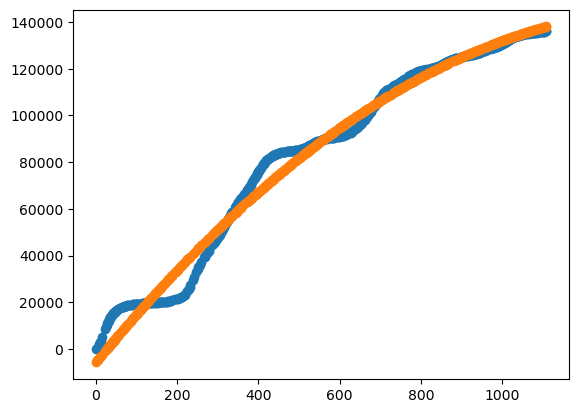

In [87]:
# refaire avec un polynome ?

poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

model = LinearRegression()
model.fit(xtrain_poly, ytrain)
print(model.score(xtrain_poly, ytrain))

pred_poly = model.predict(xtest_poly)
plt.plot(xtest, ytest, 'o')
plt.plot(xtest, pred_poly, 'o')
plt.draw()


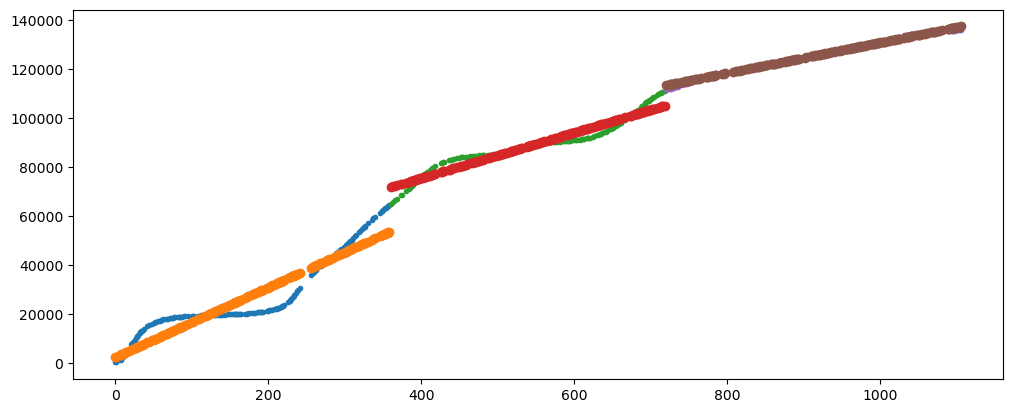

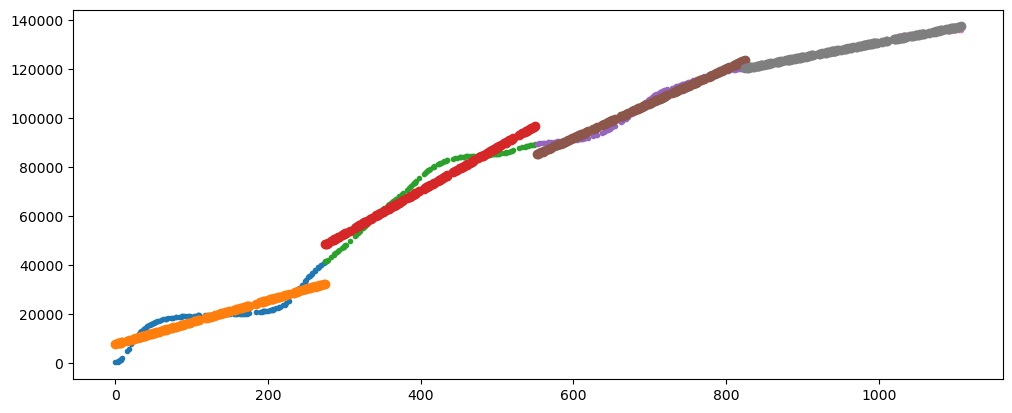

In [92]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# découpage manuel du tableau
# on va devoir le faire de nombreuses fois donc on va faire une fonction

# automatise le calcul des valeurs prédites
def autofit(x, y, polyfit=0, t_size=.5) :
    
    model = LinearRegression()
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=t_size)

    if polyfit > 1 :
        poly = PolynomialFeatures(degree=polyfit)
        xtrain = poly.fit_transform(xtrain)
        xtest_poly = poly.fit_transform(xtest)

    model.fit(xtrain, ytrain)

    pred = np.array(0)
    if polyfit > 1 : pred = model.predict(xtest_poly)
    else : pred = model.predict(xtest)

    return xtest, ytest, pred

# découpe un dataset selon un tableau de valeurs limites et affiche le resultat sur
# le même graphique
def splitplot(x_data, y_data, split:list):

    plt.figure().set_figwidth(12)
    split.append(-1)
    nprev = 0
    for n in split :
        x, ydata, ypred = autofit(x_data[nprev:n], y_data[nprev:n], polyfit=1)
        plt.plot(x, ydata, '.')
        plt.plot(x, ypred, 'o')
        nprev = n
    plt.show()

div3 = [360,720]
div4 = [275,550,825]

splitplot(jours, dc, div3)
splitplot(jours, dc, div4)


[255, 376, 693]


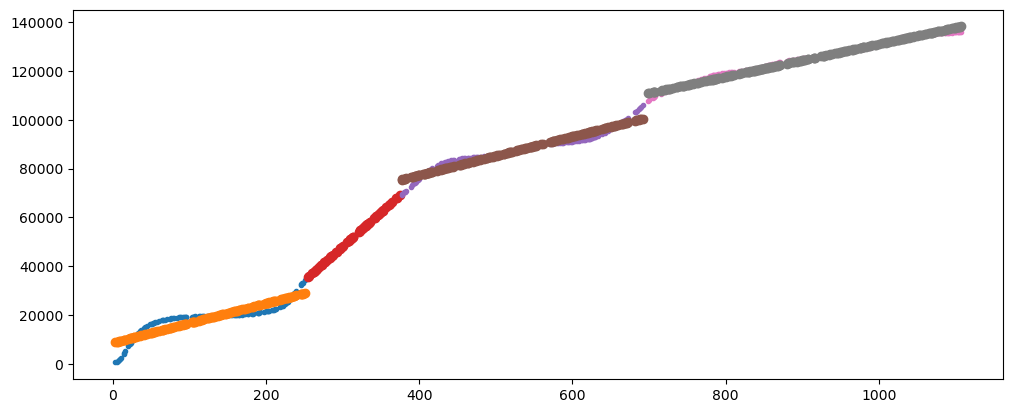

In [107]:
# autodécoupage avec l‘arbre de décision

from sklearn import tree
clf = tree.DecisionTreeRegressor(max_leaf_nodes = 4)
clf = clf.fit(jours, dc)

div_tree = [int(x) for x in clf.tree_.threshold if x > 0]
div_tree.sort()

print(div_tree)

splitplot(jours, dc, div_tree)

